#### Dataset 1: id:23-23-23-1
#### Dataset 2: id:23-23--23-1

#### Libraries and Setup

In [1]:
%pip install scikit-learn matplotlib pandas numpy;

Note: you may need to restart the kernel to use updated packages.


# Week 4 Assignment

## Introduction
In this notebook, we will go through the full ML workflow for two datasets. We will use Logistic Regression and kNN Classifiers and find the best parameters for the model. We are going to inspect their Confusion Matrices and ROC curves and present the best regularization strength and degree for Logisitic Regression for both the datasets and the best `k` for kNN Classifier.


# Dataset - 1

## Table of Contents
1. [Load and Visualize the Data](#Load-and-Visualize-the-Data)
2. [Logistic Regression](#Logistic-Regression)
    - [Augment Features and Prepare for Cross-Validation](#Augment-Features-and-Prepare-for-Cross-Validation)
    - [Cross-Validation Plot](#Cross-Validation-Plot)
    - [Visualize Decision Boundary](#Visualize-Decision-Boundary)
3. [k-NN Classifier](#k-NN-Classifier)
    - [Cross-Validation](#Cross-Validation)
    - [Cross Validation Plot](#Cross-Validation-Plot)
    - [Visualize Decision Boundary](#Visualize-Decision-Boundary)
4. [Confusion Matrices](#Confusion-Matrices)
5. [ROC Curves](#ROC-Curves)

## Load and Visualize the Data

    x_1   x_2  target
0  0.07 -0.98      -1
1  0.05  0.58       1
2 -0.09  0.96       1
3 -0.95  0.44      -1
4  1.00  0.76       1


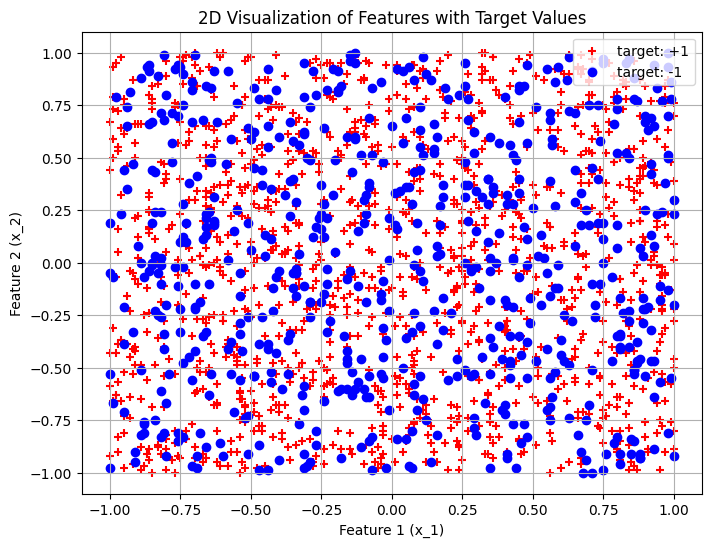

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('week4.csv', header=None, names=['x_1', 'x_2', 'target'])
print(df.head())

# Extract features and target
X1 = df.iloc[:, 0]  # (x_1)
X2 = df.iloc[:, 1]  # (x_2)
y = df.iloc[:, 2]   # target

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='red', label="target: +1")
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label="target: -1")

plt.xlabel("Feature 1 (x_1)")
plt.ylabel("Feature 2 (x_2)")
plt.title("2D Visualization of Features with Target Values")
plt.legend()

plt.grid(True)
plt.show()


## Logistic Regression

### Augment Features and Prepare for Cross-Validation

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

X = np.column_stack((X1, X2))

# Define polynomial degrees and C values for cross-validation
degrees = [1, 2, 3, 4, 5]
C_values = np.logspace(-4, 4, 20)

# Cross-validation Split of 5 folds
skf = StratifiedKFold(n_splits=5)

f1_scores_mean = np.zeros((len(degrees), len(C_values)))
f1_scores_std = np.zeros((len(degrees), len(C_values)))

# Cross-validation loop over polynomial degrees and C values
for i, degree in enumerate(degrees):
    for j, C in enumerate(C_values):
        model = make_pipeline(
            PolynomialFeatures(degree=degree),
            StandardScaler(),
            LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=10000)
        )

        scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
        f1_scores_mean[i, j] = scores.mean()
        f1_scores_std[i, j] = scores.std()

print("Cross-validation completed.")

Cross-validation completed.


### Cross-Validation Plot

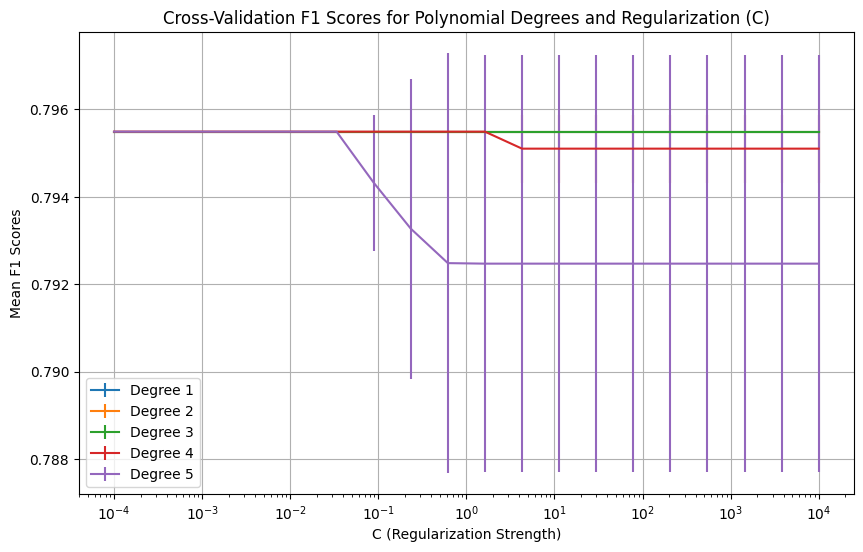

In [3]:
# Plot cross-validation results
plt.figure(figsize=(10, 6))

for i, degree in enumerate(degrees):
    plt.errorbar(C_values, f1_scores_mean[i], yerr=f1_scores_std[i], label=f'Degree {degree}')

plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean F1 Scores')
plt.title('Cross-Validation F1 Scores for Polynomial Degrees and Regularization (C)')
plt.legend()
plt.grid(True)
plt.show()

### Visualize Decision Boundary

Best Degree: 3, Best C: 0.0001


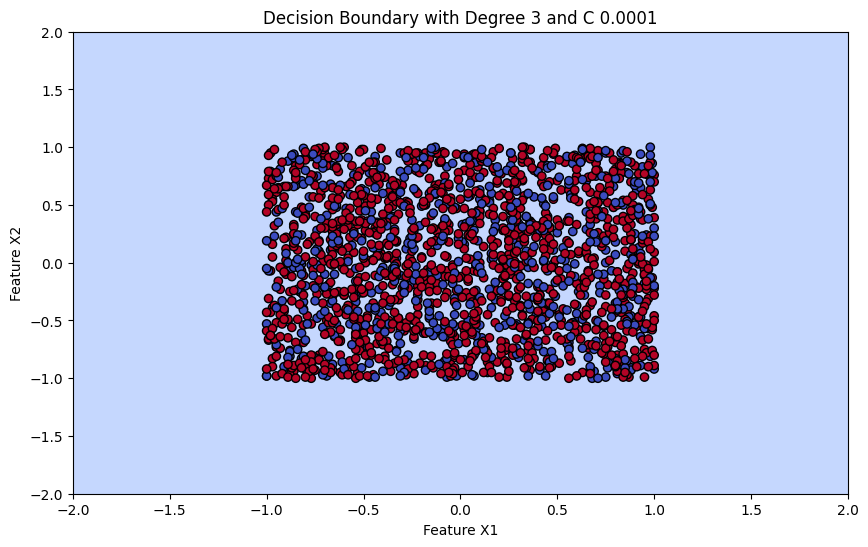

In [4]:
best_degree = 3
best_C = 0.0001

print(f"Best Degree: {best_degree}, Best C: {best_C}")

# Train the best model
best_model = make_pipeline(
    PolynomialFeatures(degree=best_degree),
    StandardScaler(),
    LogisticRegression(C=best_C, penalty='l2', solver='lbfgs', max_iter=10000)
)
best_model.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = best_model.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # Decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')  # Data points
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title(f'Decision Boundary with Degree {best_degree} and C {best_C}')
plt.show()

## k-NN Classifier

### Cross-Validation

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Define range of k-values
k_values = range(1, 21)

skf = StratifiedKFold(n_splits=5)

f1_scores_mean = []
f1_scores_std = []

# Loop over different k values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn_model, X, y, cv=skf, scoring='f1')

    f1_scores_mean.append(scores.mean())
    f1_scores_std.append(scores.std())

f1_scores_mean = np.array(f1_scores_mean)
f1_scores_std = np.array(f1_scores_std)
print("Cross-validation completed.")

Cross-validation completed.


### Cross-Validation-Plot

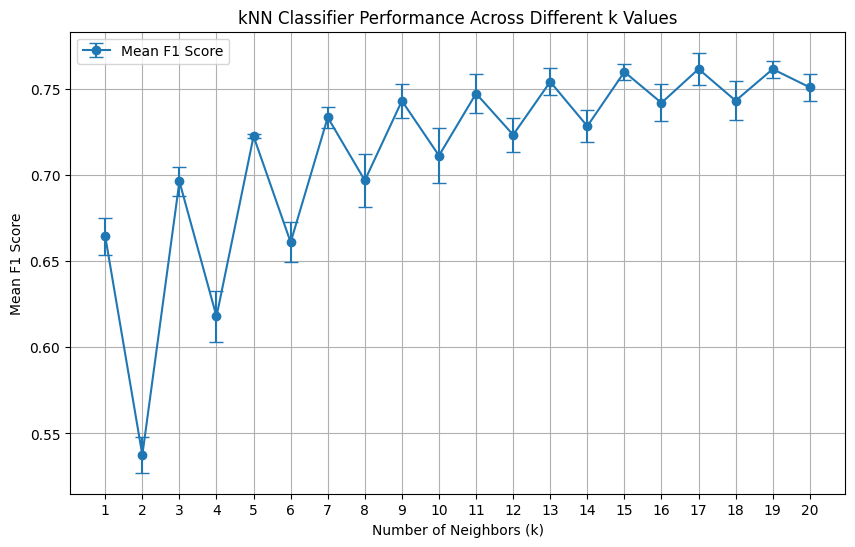

The optimal number of neighbors (k) is 17, with a mean F1 score of 0.7615.


In [6]:
# Plot the mean F1 scores with error bars for the standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, f1_scores_mean, yerr=f1_scores_std, fmt='o-', capsize=5, label='Mean F1 Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean F1 Score')
plt.title('kNN Classifier Performance Across Different k Values')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Best k based on the highest mean F1 score
best_k = k_values[np.argmax(f1_scores_mean)]
best_score = f1_scores_mean.max()
print(f"The optimal number of neighbors (k) is {best_k}, with a mean F1 score of {best_score:.4f}.")

### Visualize Decision Boundary

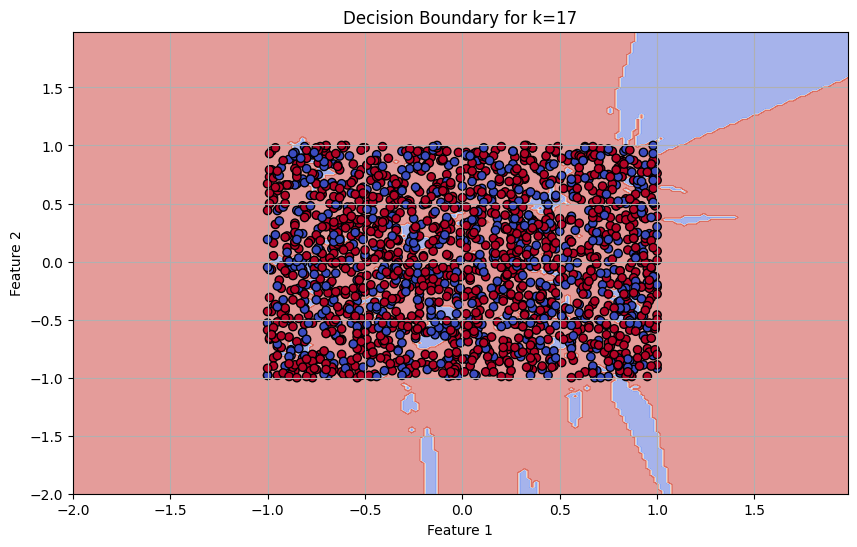

In [7]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

plt.title(f'Decision Boundary for k={best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

## Confusion Matrices

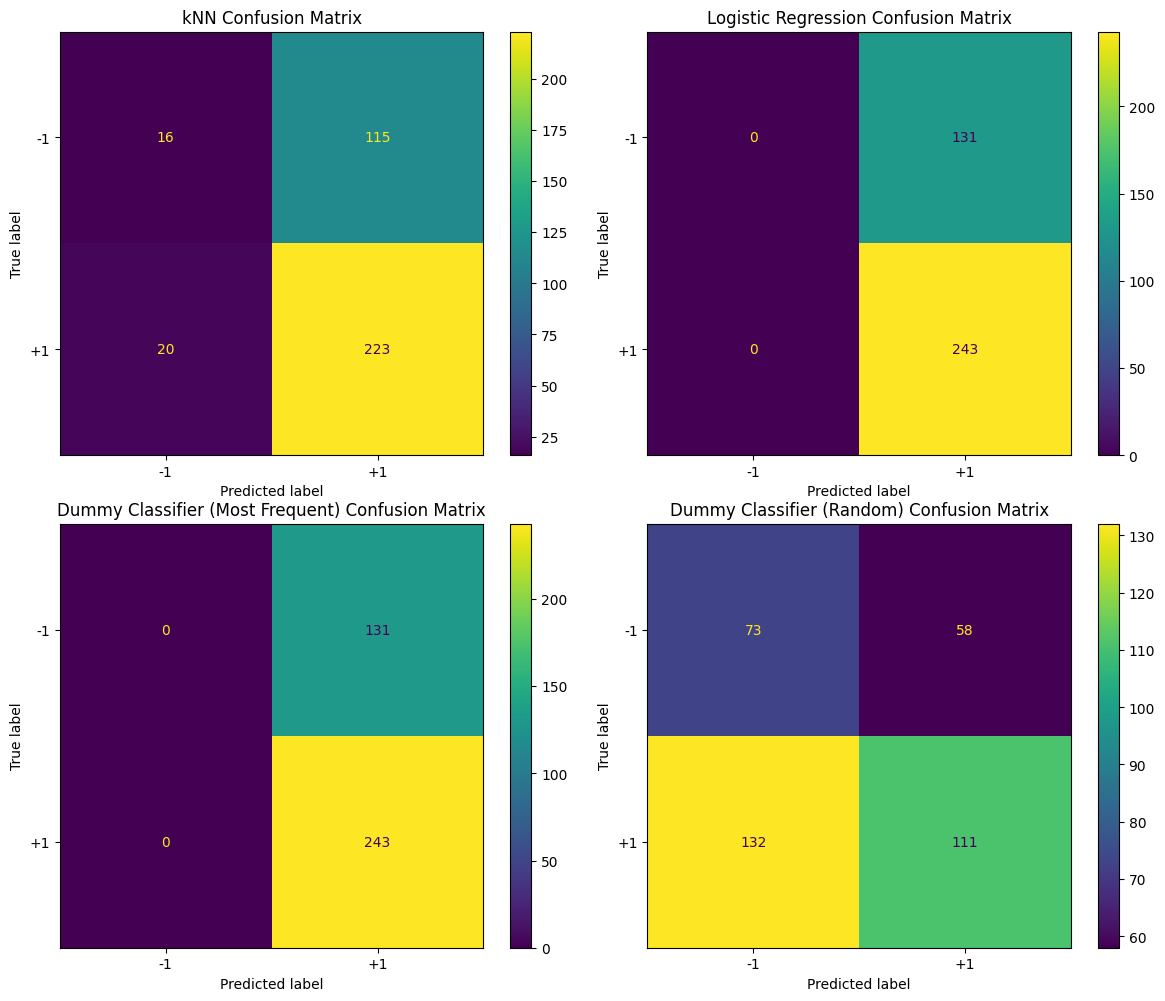

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

best_degree = 3
best_C = 0.0001

log_reg_model = make_pipeline(
    PolynomialFeatures(degree=best_degree),
    StandardScaler(),
    LogisticRegression(C=best_C, penalty='l2', solver='lbfgs', max_iter=10000)
)
log_reg_model.fit(X_train, y_train)

# Create baseline classifiers
dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_random = DummyClassifier(strategy='uniform')

dummy_most_frequent.fit(X_train, y_train)
dummy_random.fit(X_train, y_train)

# Make predictions
knn_predictions = knn.predict(X_test)
log_reg_predictions = log_reg_model.predict(X_test)
dummy_most_frequent_predictions = dummy_most_frequent.predict(X_test)
dummy_random_predictions = dummy_random.predict(X_test)

# Calculate confusion matrices
confusion_knn = confusion_matrix(y_test, knn_predictions)
confusion_log_reg = confusion_matrix(y_test, log_reg_predictions)
confusion_dummy_most_frequent = confusion_matrix(y_test, dummy_most_frequent_predictions)
confusion_dummy_random = confusion_matrix(y_test, dummy_random_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
ConfusionMatrixDisplay(confusion_knn, display_labels=['-1', '+1']).plot(ax=axes[0])
axes[0].set_title('kNN Confusion Matrix')
ConfusionMatrixDisplay(confusion_log_reg, display_labels=['-1', '+1']).plot(ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
ConfusionMatrixDisplay(confusion_dummy_most_frequent, display_labels=['-1', '+1']).plot(ax=axes[2])
axes[2].set_title('Dummy Classifier (Most Frequent) Confusion Matrix')
ConfusionMatrixDisplay(confusion_dummy_random, display_labels=['-1', '+1']).plot(ax=axes[3])
axes[3].set_title('Dummy Classifier (Random) Confusion Matrix')
plt.tight_layout()
plt.show()

## ROC Curves

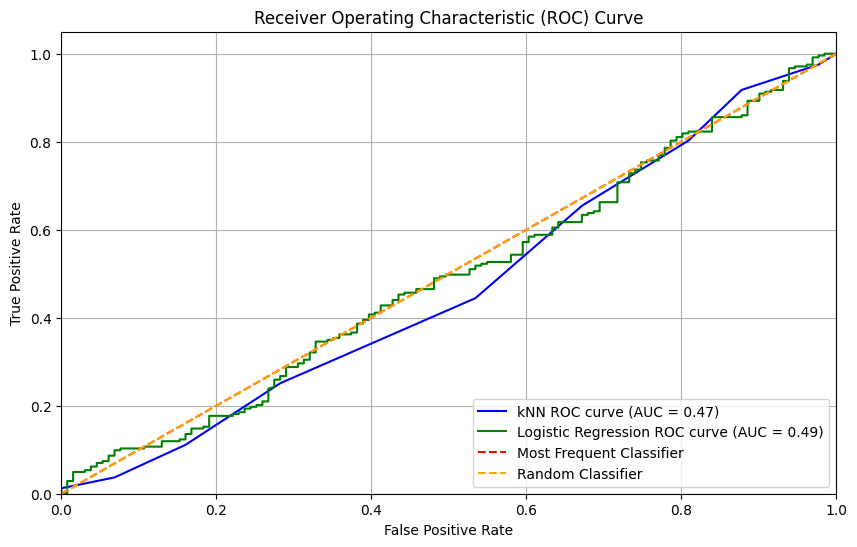

In [9]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for ROC curve
knn_probs = knn.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg_model.predict_proba(X_test)[:, 1]
dummy_most_frequent_probs = dummy_most_frequent.predict_proba(X_test)[:, 1]
dummy_random_probs = dummy_random.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_probs)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Baseline ROC points 
fpr_dummy_most_frequent = np.array([0, 1])
tpr_dummy_most_frequent = np.array([0, 1])
fpr_dummy_random = np.array([0, 1])
tpr_dummy_random = np.array([0, 1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'kNN ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_log_reg, tpr_log_reg, color='green', label=f'Logistic Regression ROC curve (AUC = {roc_auc_log_reg:.2f})')

# Plot baseline classifiers
plt.plot(fpr_dummy_most_frequent, tpr_dummy_most_frequent, color='red', linestyle='--', label='Most Frequent Classifier')
plt.plot(fpr_dummy_random, tpr_dummy_random, color='orange', linestyle='--', label='Random Classifier')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Dataset - 2

## Table of Contents
1. [Load and Visualize the Data](#Load-and-Visualize-the-Data)
2. [Logistic Regression](#Logistic-Regression)
    - [Augment Features and Prepare for Cross-Validation](#Augment-Features-and-Prepare-for-Cross-Validation)
    - [Cross-Validation Plot](#Cross-Validation-Plot)
    - [Visualize Decision Boundary](#Visualize-Decision-Boundary)
3. [k-NN Classifier](#k-NN-Classifier)
    - [Cross-Validation](#Cross-Validation)
    - [Cross Validation Plot](#Cross-Validation-Plot)
    - [Visualize Decision Boundary](#Visualize-Decision-Boundary)
4. [Confusion Matrices](#Confusion-Matrices)
5. [ROC Curves](#ROC-Curves)

## Load and Visualize the Data

    x_1   x_2  target
0  0.51 -0.76       1
1  0.50  0.60      -1
2  0.02 -0.58       1
3 -0.17  0.13      -1
4 -0.61  0.44       1


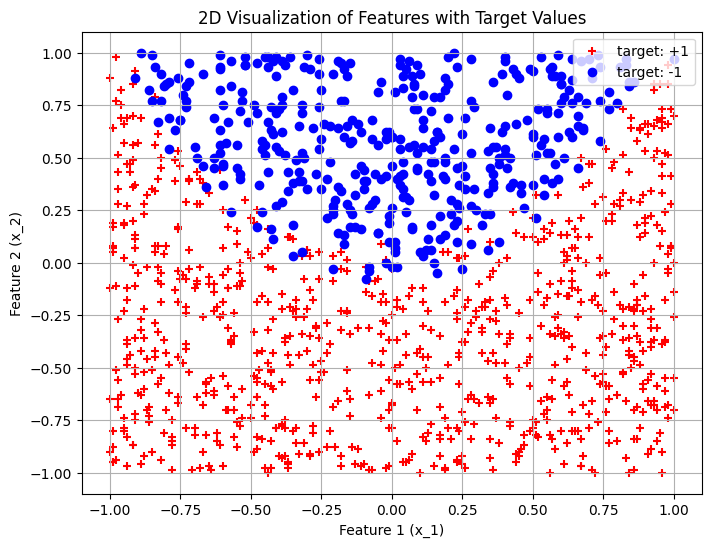

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('week4-2.csv', header=None, names=['x_1', 'x_2', 'target'])
print(df.head())

# Extract features and target
X1 = df.iloc[:, 0]  # (x_1)
X2 = df.iloc[:, 1]  # (x_2)
y = df.iloc[:, 2]   # target

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='red', label="target: +1")
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label="target: -1")

plt.xlabel("Feature 1 (x_1)")
plt.ylabel("Feature 2 (x_2)")
plt.title("2D Visualization of Features with Target Values")
plt.legend()

plt.grid(True)
plt.show()


## Logistic Regression

### Augment Features and Prepare for Cross-Validation

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

X = np.column_stack((X1, X2))

# Define polynomial degrees and C values for cross-validation
degrees = [1, 2, 3, 4, 5]
C_values = np.logspace(-4, 4, 20)

# Cross-validation Split of 5 folds
skf = StratifiedKFold(n_splits=5)

f1_scores_mean = np.zeros((len(degrees), len(C_values)))
f1_scores_std = np.zeros((len(degrees), len(C_values)))

# Cross-validation loop over polynomial degrees and C values
for i, degree in enumerate(degrees):
    for j, C in enumerate(C_values):
        model = make_pipeline(
            PolynomialFeatures(degree=degree),
            StandardScaler(),
            LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=10000)
        )

        scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
        f1_scores_mean[i, j] = scores.mean()
        f1_scores_std[i, j] = scores.std()

print("Cross-validation completed.")


Cross-validation completed.


### Cross-Validation Plot

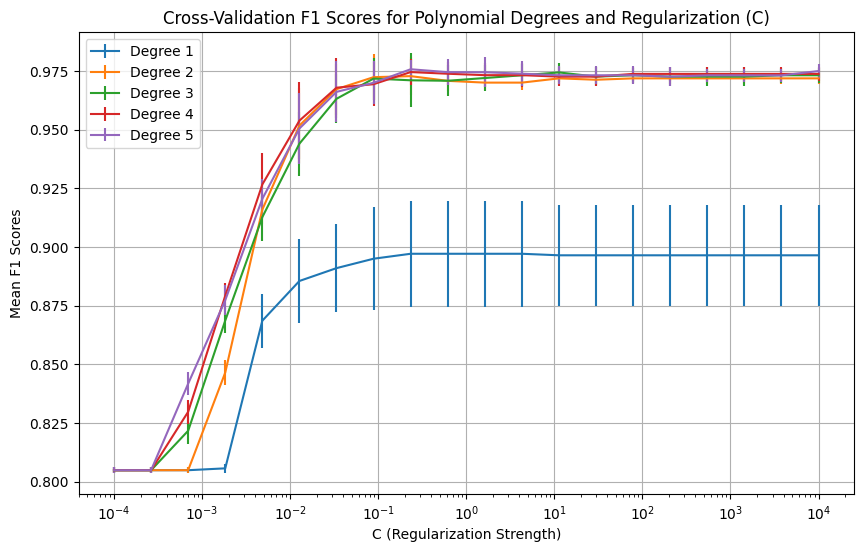

In [21]:
# Plot cross-validation results
plt.figure(figsize=(10, 6))

for i, degree in enumerate(degrees):
    plt.errorbar(C_values, f1_scores_mean[i], yerr=f1_scores_std[i], label=f'Degree {degree}')

plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean F1 Scores')
plt.title('Cross-Validation F1 Scores for Polynomial Degrees and Regularization (C)')
plt.legend()
plt.grid(True)
plt.show()

### Visualize Decision Boundary

Best Degree: 5, Best C: 10000


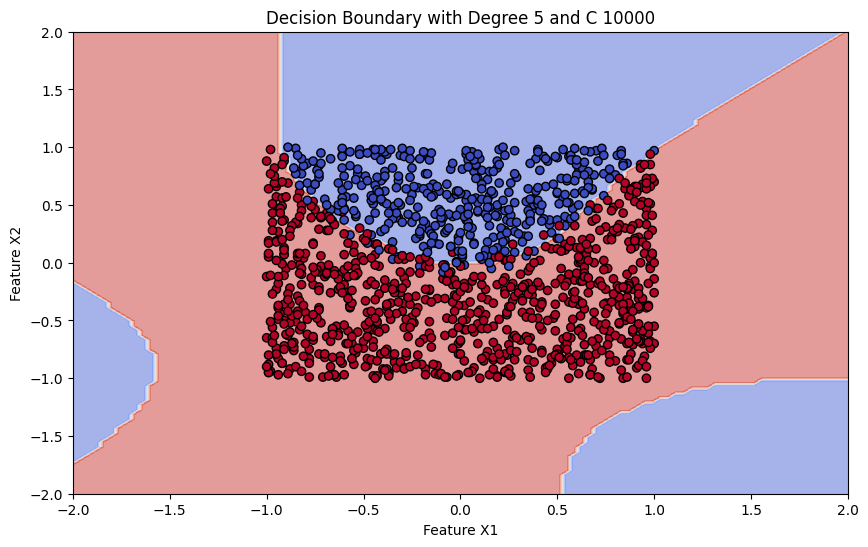

In [22]:
best_degree = 5
best_C = 10000

print(f"Best Degree: {best_degree}, Best C: {best_C}")

# Train the best model
best_model = make_pipeline(
    PolynomialFeatures(degree=best_degree),
    StandardScaler(),
    LogisticRegression(C=best_C, penalty='l2', solver='lbfgs', max_iter=10000)
)
best_model.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = best_model.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # Decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')  # Data points
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title(f'Decision Boundary with Degree {best_degree} and C {best_C}')
plt.show()

## k-NN Classifier

### Cross-Validation

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Define range of k-values
k_values = range(1, 21)

skf = StratifiedKFold(n_splits=5)

f1_scores_mean = []
f1_scores_std = []

# Loop over different k values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn_model, X, y, cv=skf, scoring='f1')

    f1_scores_mean.append(scores.mean())
    f1_scores_std.append(scores.std())

f1_scores_mean = np.array(f1_scores_mean)
f1_scores_std = np.array(f1_scores_std)
print("Cross-validation completed.")

Cross-validation completed.


### Cross-Validation-Plot

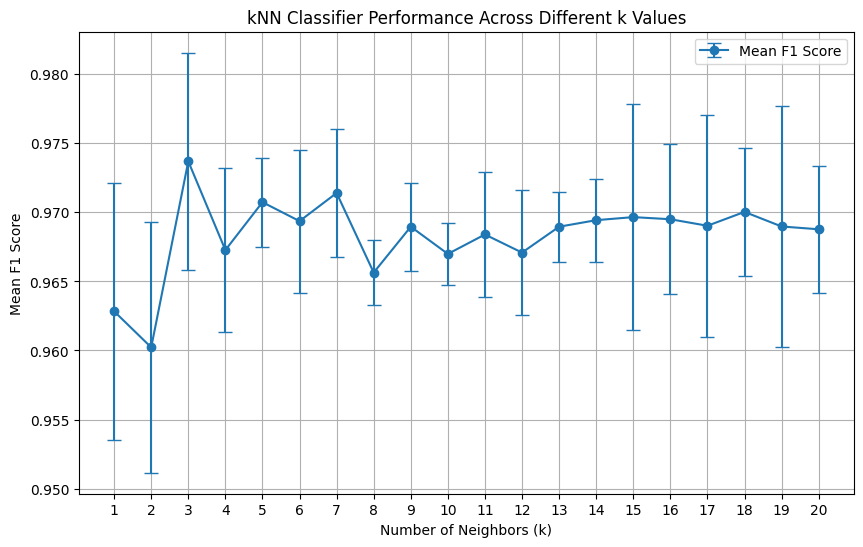

The optimal number of neighbors (k) is 3, with a mean F1 score of 0.9737.


In [24]:
# Plot the mean F1 scores with error bars for the standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, f1_scores_mean, yerr=f1_scores_std, fmt='o-', capsize=5, label='Mean F1 Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean F1 Score')
plt.title('kNN Classifier Performance Across Different k Values')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Best k based on the highest mean F1 score
best_k = k_values[np.argmax(f1_scores_mean)]
best_score = f1_scores_mean.max()
print(f"The optimal number of neighbors (k) is {best_k}, with a mean F1 score of {best_score:.4f}.")

### Visualize Decision Boundary

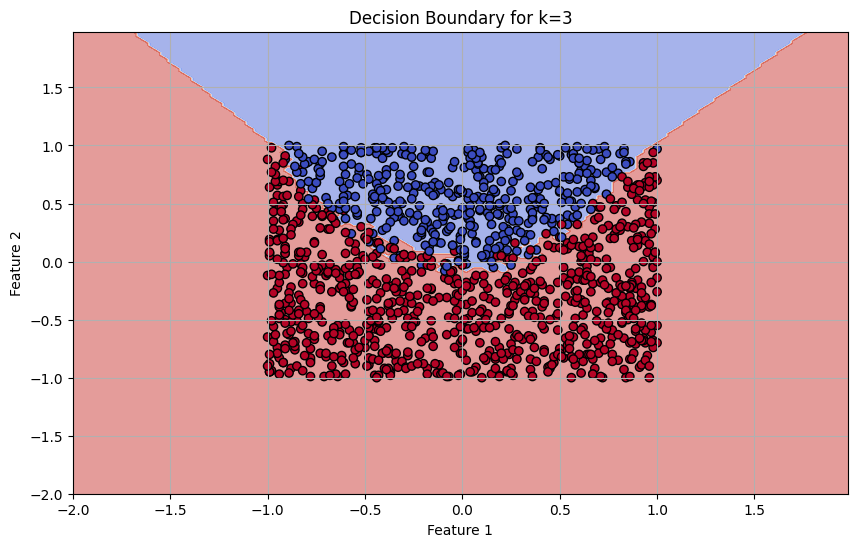

In [25]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

plt.title(f'Decision Boundary for k={best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

## Confusion Matrices

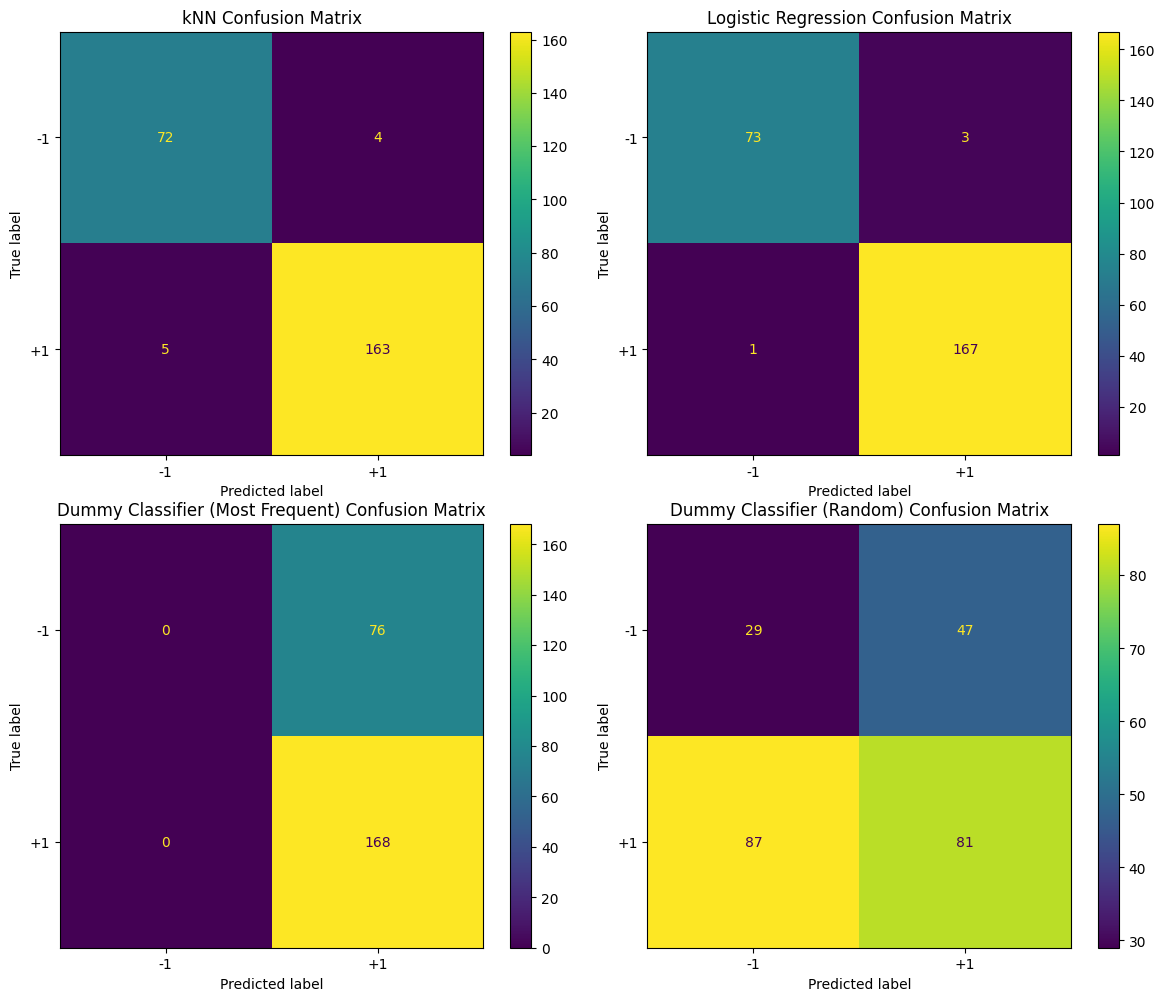

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

best_degree = 5
best_C = 1000

log_reg_model = make_pipeline(
    PolynomialFeatures(degree=best_degree),
    StandardScaler(),
    LogisticRegression(C=best_C, penalty='l2', solver='lbfgs', max_iter=10000)
)
log_reg_model.fit(X_train, y_train)

# Create baseline classifiers
dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_random = DummyClassifier(strategy='uniform')

dummy_most_frequent.fit(X_train, y_train)
dummy_random.fit(X_train, y_train)

# Make predictions
knn_predictions = knn.predict(X_test)
log_reg_predictions = log_reg_model.predict(X_test)
dummy_most_frequent_predictions = dummy_most_frequent.predict(X_test)
dummy_random_predictions = dummy_random.predict(X_test)

# Calculate confusion matrices
confusion_knn = confusion_matrix(y_test, knn_predictions)
confusion_log_reg = confusion_matrix(y_test, log_reg_predictions)
confusion_dummy_most_frequent = confusion_matrix(y_test, dummy_most_frequent_predictions)
confusion_dummy_random = confusion_matrix(y_test, dummy_random_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
ConfusionMatrixDisplay(confusion_knn, display_labels=['-1', '+1']).plot(ax=axes[0])
axes[0].set_title('kNN Confusion Matrix')
ConfusionMatrixDisplay(confusion_log_reg, display_labels=['-1', '+1']).plot(ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
ConfusionMatrixDisplay(confusion_dummy_most_frequent, display_labels=['-1', '+1']).plot(ax=axes[2])
axes[2].set_title('Dummy Classifier (Most Frequent) Confusion Matrix')
ConfusionMatrixDisplay(confusion_dummy_random, display_labels=['-1', '+1']).plot(ax=axes[3])
axes[3].set_title('Dummy Classifier (Random) Confusion Matrix')
plt.tight_layout()
plt.show()

## ROC Curves

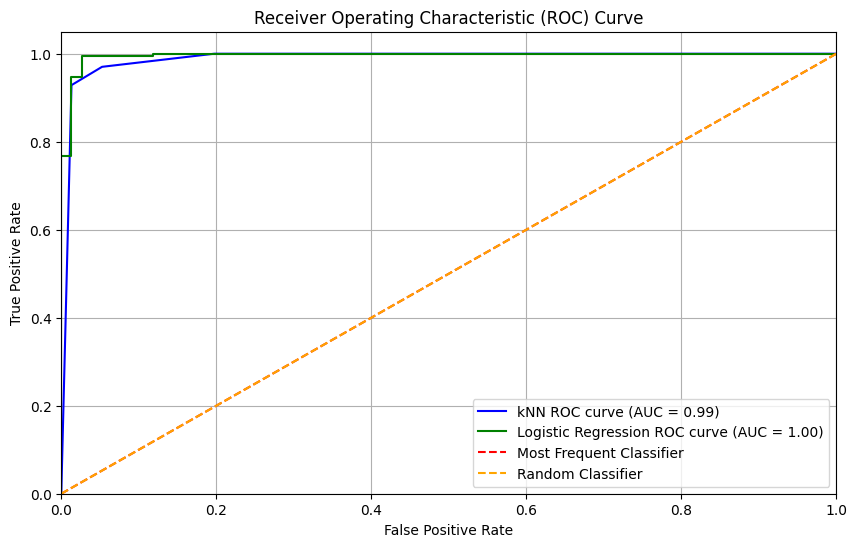

In [28]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for ROC curve
knn_probs = knn.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg_model.predict_proba(X_test)[:, 1]
dummy_most_frequent_probs = dummy_most_frequent.predict_proba(X_test)[:, 1]
dummy_random_probs = dummy_random.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_probs)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Baseline ROC points 
fpr_dummy_most_frequent = np.array([0, 1])
tpr_dummy_most_frequent = np.array([0, 1])
fpr_dummy_random = np.array([0, 1])
tpr_dummy_random = np.array([0, 1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'kNN ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_log_reg, tpr_log_reg, color='green', label=f'Logistic Regression ROC curve (AUC = {roc_auc_log_reg:.2f})')

# Plot baseline classifiers
plt.plot(fpr_dummy_most_frequent, tpr_dummy_most_frequent, color='red', linestyle='--', label='Most Frequent Classifier')
plt.plot(fpr_dummy_random, tpr_dummy_random, color='orange', linestyle='--', label='Random Classifier')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()